# Research question 3 - topic detection preprocessing 

Topic needs to be detected for each sentence. Due to short sentences I will use short text topic modeling  algorithm GSDMM (Gibbs Sampling Dirichlet Multinomial Mixture) which is similar to LDA (Latent Dirichlet Allocation) but detect only one topic per sentence.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Review-word-count-analysis" data-toc-modified-id="Review-word-count-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Review word count analysis</a></span><ul class="toc-item"><li><span><a href="#Plot-distribution-of-reviews-word-count" data-toc-modified-id="Plot-distribution-of-reviews-word-count-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot distribution of reviews word count</a></span></li><li><span><a href="#Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'" data-toc-modified-id="Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long'</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-year" data-toc-modified-id="Plot-mean-review-word-count-by-year-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot mean review word count by year</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-city" data-toc-modified-id="Plot-mean-review-word-count-by-city-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot mean review word count by city</a></span></li><li><span><a href="#Plot-mean-review-count-by-year-and-city" data-toc-modified-id="Plot-mean-review-count-by-year-and-city-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot mean review count by year and city</a></span></li></ul></li><li><span><a href="#Review-preprocessing-by-sentences" data-toc-modified-id="Review-preprocessing-by-sentences-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review preprocessing by sentences</a></span><ul class="toc-item"><li><span><a href="#Plot-most-frequent-words-before-preprocessing" data-toc-modified-id="Plot-most-frequent-words-before-preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot most frequent words before preprocessing</a></span></li><li><span><a href="#Tokenize,-lowercase-and-remove-punctuation" data-toc-modified-id="Tokenize,-lowercase-and-remove-punctuation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokenize, lowercase and remove punctuation</a></span></li><li><span><a href="#Lemmatize,-remove-stop-words-and-tokens-shorter-than-2-character" data-toc-modified-id="Lemmatize,-remove-stop-words-and-tokens-shorter-than-2-character-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Lemmatize, remove stop words and tokens shorter than 2 character</a></span></li><li><span><a href="#Plot-most-frequent-words-after-preprocessing" data-toc-modified-id="Plot-most-frequent-words-after-preprocessing-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plot most frequent words after preprocessing</a></span></li><li><span><a href="#Plot-wordcloud-of-most-frequent-words" data-toc-modified-id="Plot-wordcloud-of-most-frequent-words-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plot wordcloud of most frequent words</a></span></li><li><span><a href="#Remove-less-frequent-words" data-toc-modified-id="Remove-less-frequent-words-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Remove less frequent words</a></span></li></ul></li></ul></div>

### Setup

#### Imports

In [1]:
import numpy as np
import pandas as pd

# Gensim
import gensim
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/natalia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Styles

In [3]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

#### Read data

In [4]:
def read_data():
    western_df = pd.read_pickle('western_df_sentiment.pkl')
    non_western_df = pd.read_pickle('non_western_df_sentiment.pkl')
    western_df['type'] = 'Western'
    non_western_df['type'] = 'Non-Western'
    return pd.concat([western_df, non_western_df]).reset_index(drop=True)

In [5]:
data = read_data()
print(data.shape)
data.head()

(3557399, 26)


id        date                                           comments  \
0  13913  2010-08-18  My girlfriend and I hadn't known Alina before ...   
1  13913  2011-07-11  Alina was a really good host. The flat is clea...   
2  13913  2011-09-13  Alina is an amazing host. She made me feel rig...   
3  13913  2011-10-03  Alina's place is so nice, the room is big and ...   
4  13913  2011-10-09  Nice location in Islington area, good for shor...   

   host_id neighbourhood_cleansed    city  latitude  longitude  \
0    54730              Islington  London  51.56802   -0.11121   
1    54730              Islington  London  51.56802   -0.11121   
2    54730              Islington  London  51.56802   -0.11121   
3    54730              Islington  London  51.56802   -0.11121   
4    54730              Islington  London  51.56802   -0.11121   

   number_of_reviews first_review  ...  \
0                 21   2010-08-18  ...   
1                 21   2010-08-18  ...   
2                 21   2010-08-18  ...   
3                 21   2010-08-18  ...   
4                 21   2010-08-18  ...   

                                   comments_expanded  \
0  My girlfriend and I had not known Alina before...   
1  Alina was a really good host. The flat is clea...   
2  Alina is an amazing host. She made me feel rig...   
3  Alina's place is so nice, the room is big and ...   
4  Nice location in Islington area, good for shor...   

                                    comments_cleaned review_word_count  year  \
0  My girlfriend and I had not known Alina before...               152  2010   
1  Alina was a really good host. The flat is clea...                31  2011   
2  Alina is an amazing host. She made me feel rig...                70  2011   
3  Alina s place is so nice the room is big and c...                87  2011   
4  Nice location in Islington area good for short...                17  2011   

   sentiment_from_rating sentiment_reviews sentiment_reviews_textblob  \
0                    pos                 1                          1   
1                    pos                 1                          1   
2                    pos                 1                          1   
3                    pos                 1                          1   
4                    pos                 1                          1   

                               comments_to_sentences  \
0  [My girlfriend and I had not known Alina befor...   
1  [Alina was a really good host., The flat is cl...   
2  [Alina is an amazing host., She made me feel r...   
3  [Alina s place is so nice the room is big and ...   
4  [Nice location in Islington area good for shor...   

              sentiment_sentences     type  
0  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1]  Western  
1                       [0, 0, 0]  Western  
2           [1, 0, 1, 1, 0, 0, 1]  Western  
3                    [1, 1, 0, 1]  Western  
4                          [1, 1]  Western  

[5 rows x 26 columns]

### Review word count analysis

#### Plot distribution of reviews word count

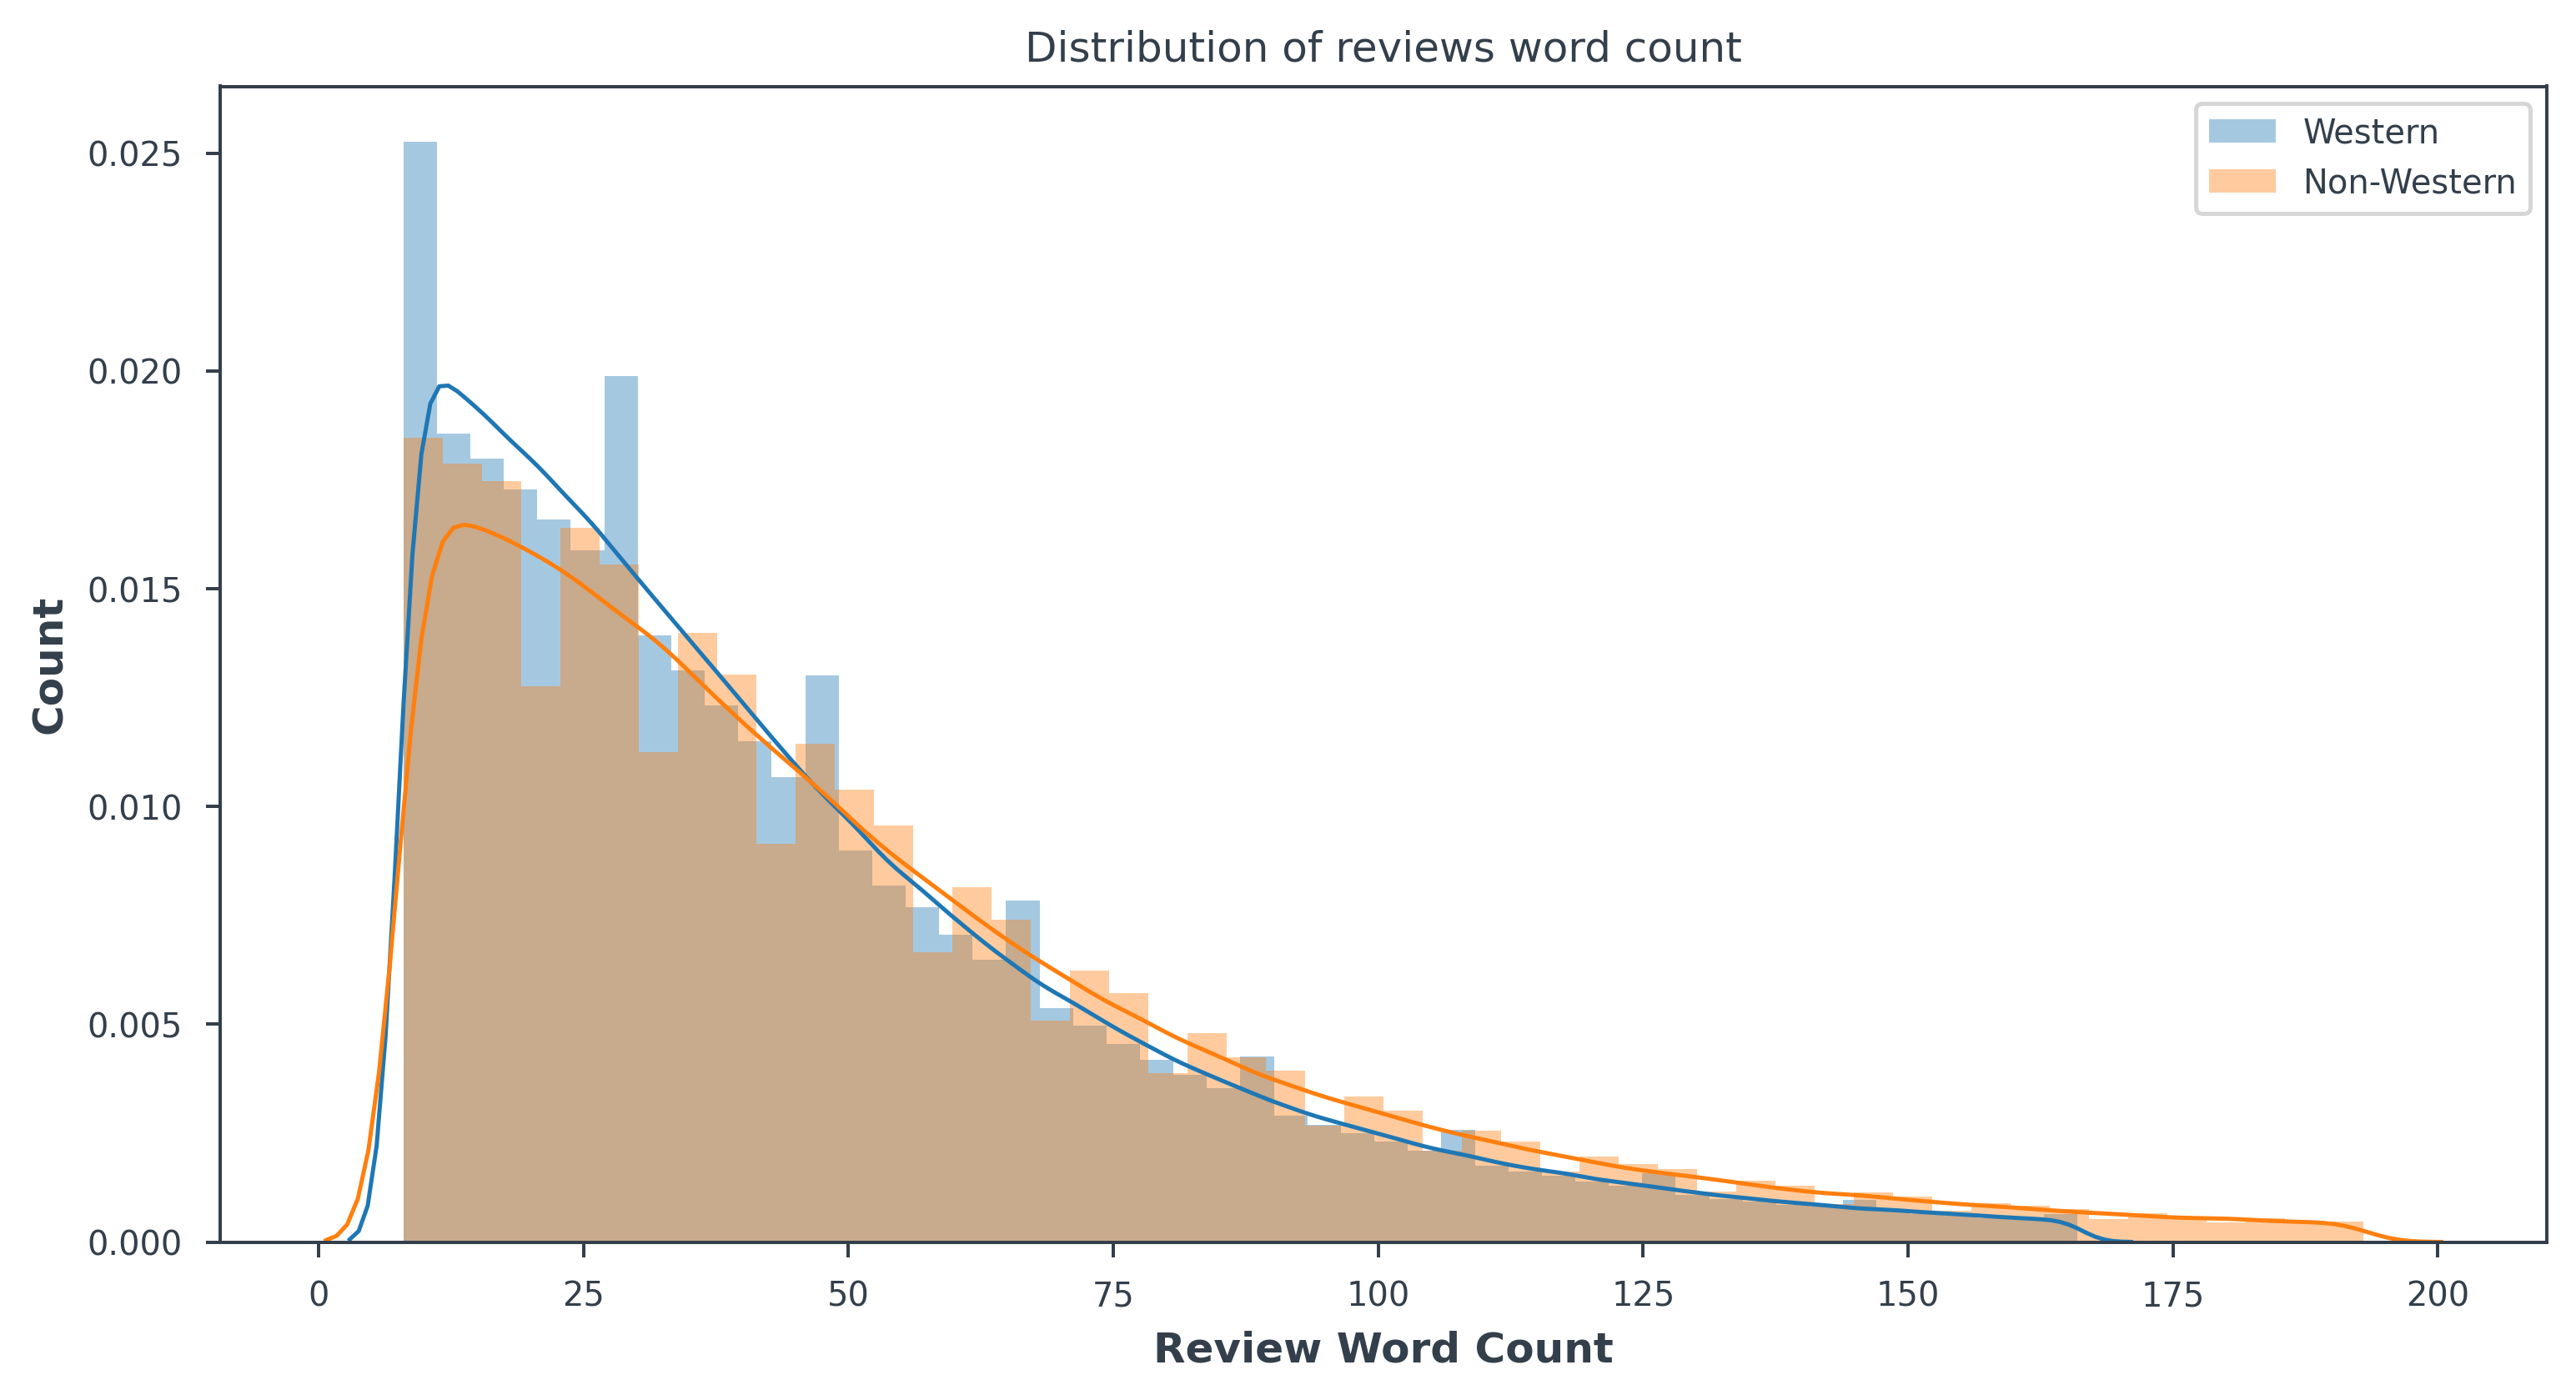

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data[data.type=='Western'].review_word_count, bins=50, ax=ax, label='Western')
sns.distplot(data[data.type=='Non-Western'].review_word_count, bins=50, ax=ax, label='Non-Western')

plt.title('Distribution of reviews word count')
plt.xlabel('Review Word Count')
plt.ylabel('Count')
plt.legend()

plt.show();

In [7]:
print('The average number of words in reviews is: {}'.format(round(data.review_word_count.mean())))
print('The minimum number of words in reviews is: {}'.format(min(data.review_word_count)))
print('The maximum number of words in reviews is: {}'.format(max(data.review_word_count)))

The average number of words in reviews is: 47
The minimum number of words in reviews is: 8
The maximum number of words in reviews is: 193


#### Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long' 

In [8]:
bins = [0, 20, 50, 193]
labels = ['Short', 'Medium', 'Long']
data['review_word_bined'] = pd.cut(data['review_word_count'], bins=bins, labels=labels)

In [9]:
data.review_word_bined[data.type=='Western'].value_counts()

Medium    1095560
Long       905072
Short      666727
Name: review_word_bined, dtype: int64

In [10]:
data.review_word_bined[data.type=='Non-Western'].value_counts()

Long      354087
Medium    344596
Short     191357
Name: review_word_bined, dtype: int64

#### Plot mean review word count by year

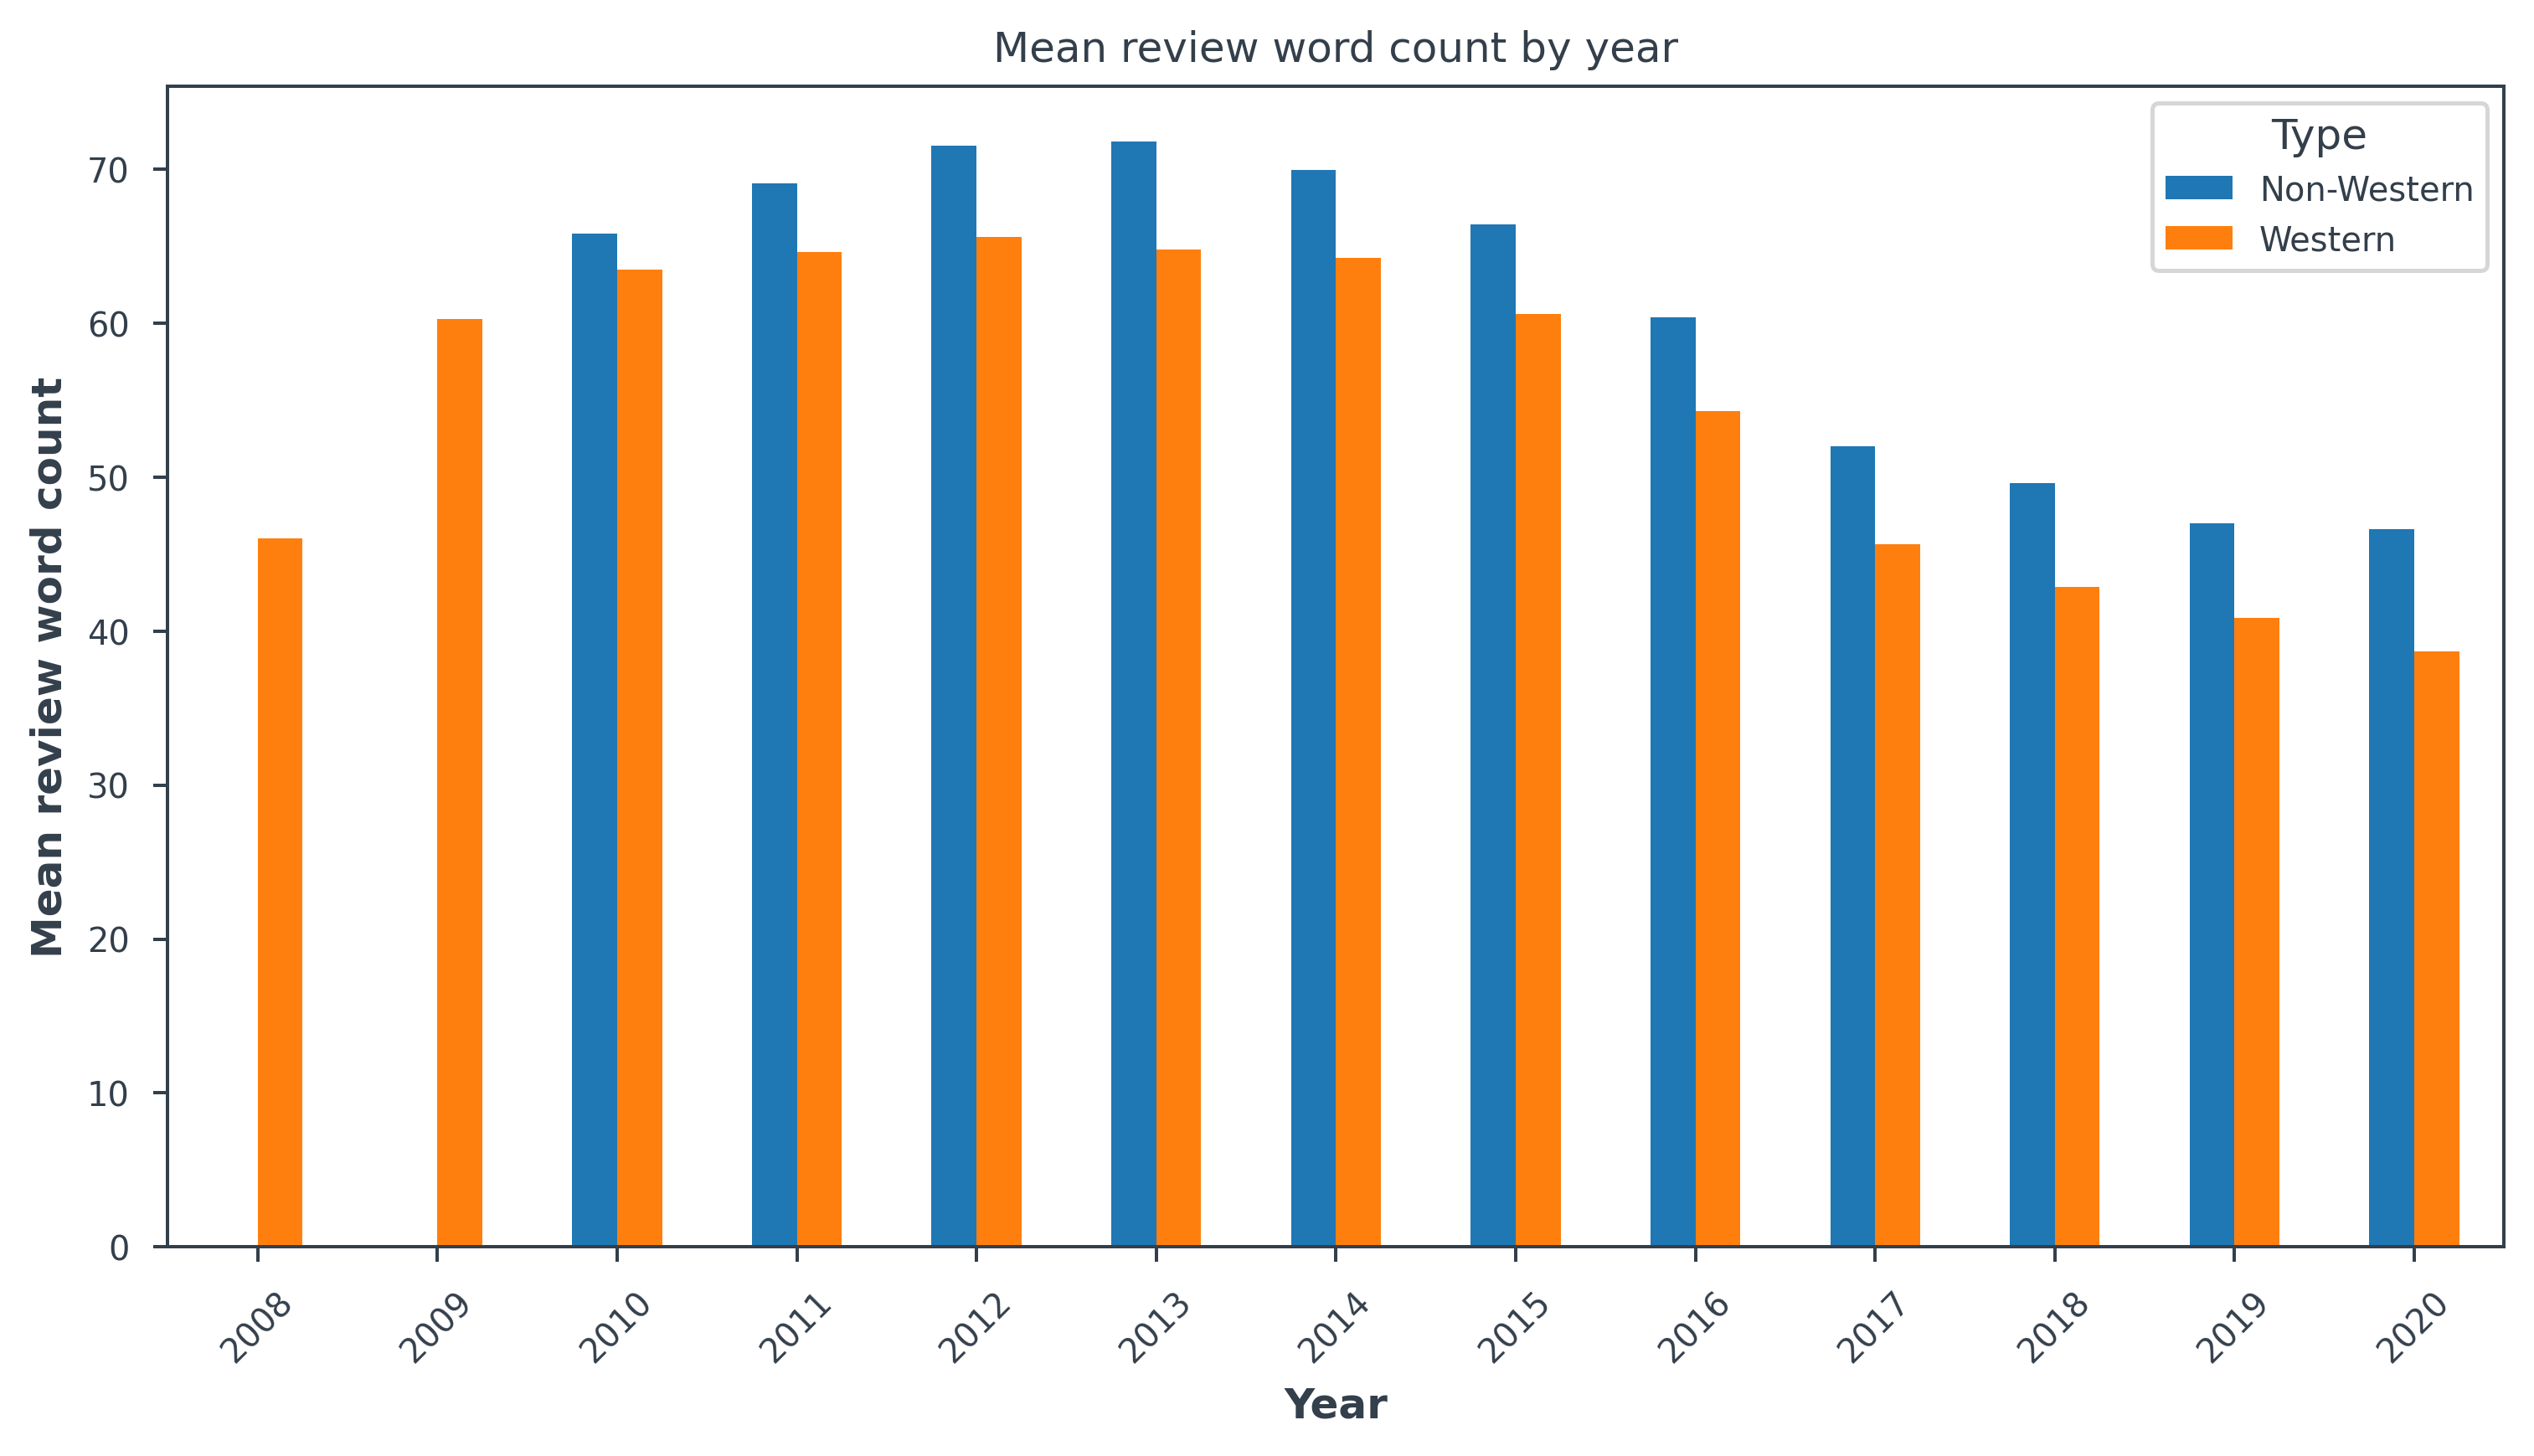

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['year', 'type'])['review_word_count'].mean().unstack().plot(kind='bar', ax=ax)
plt.title('Mean review word count by year')
plt.legend(title='Type')
plt.xlabel('Year')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review word count by city

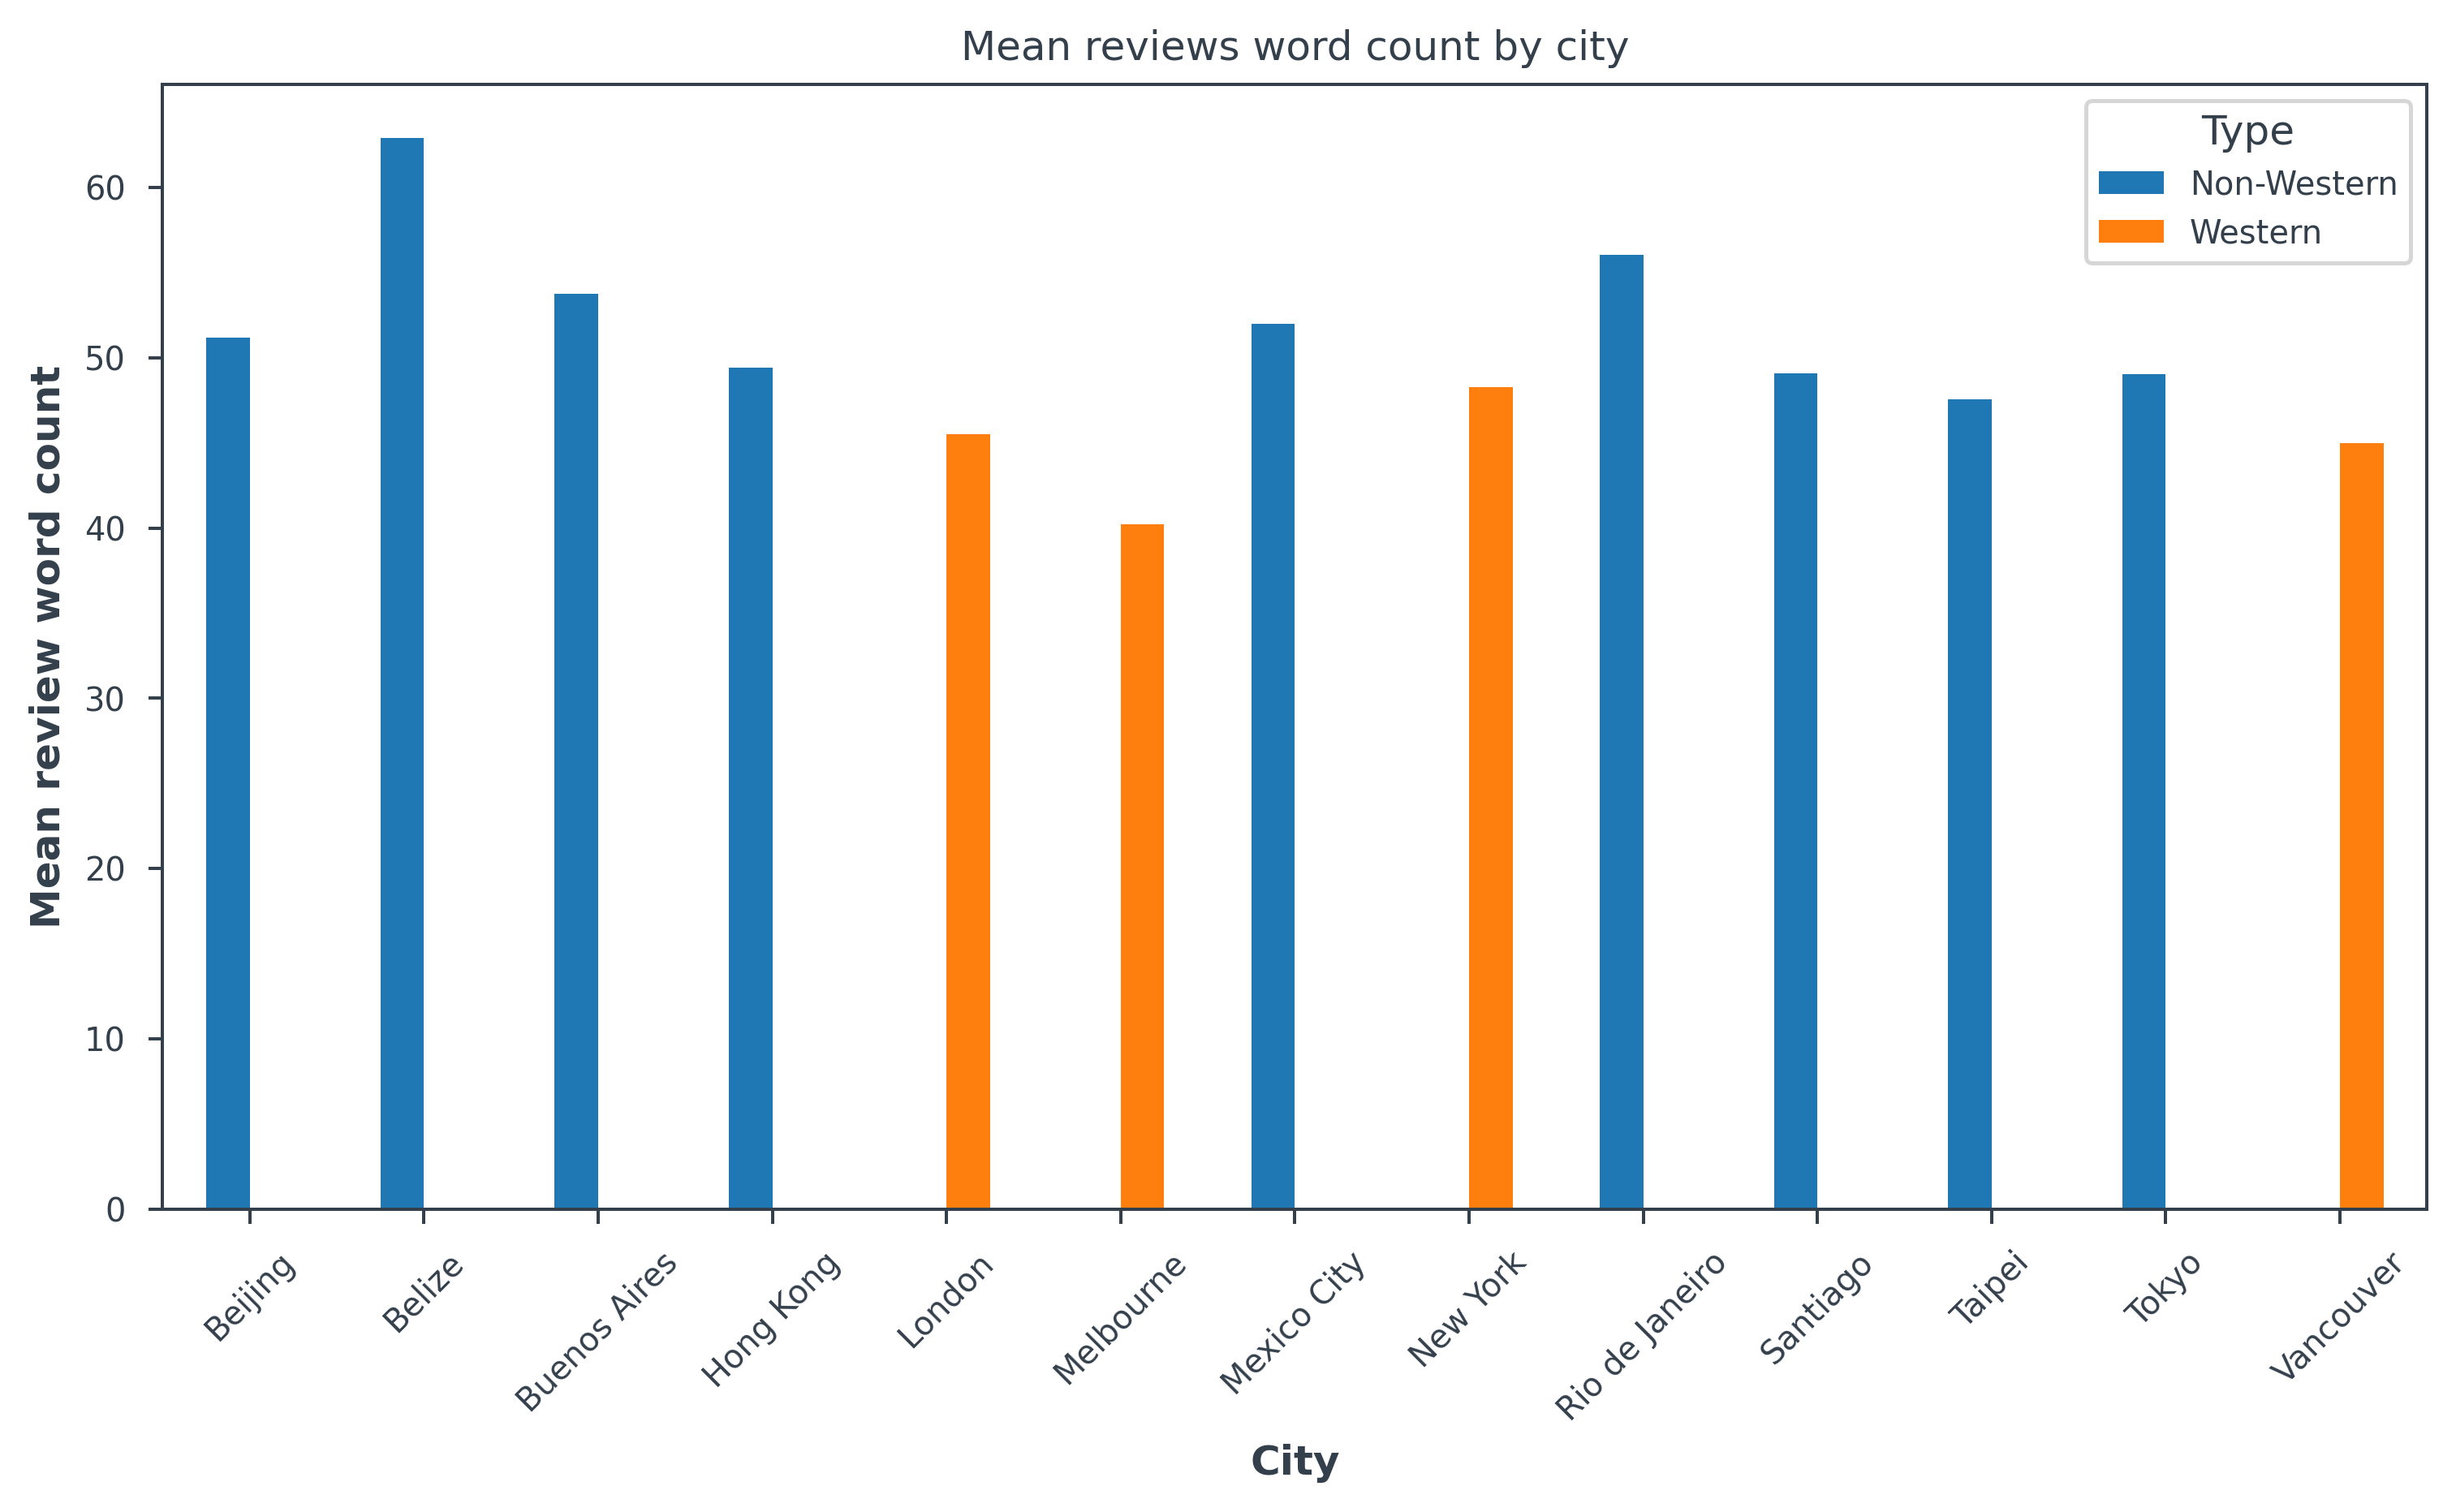

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'type'])['review_word_count'].mean().reset_index().pivot('city', 'type', 'review_word_count')\
            .plot(kind='bar', ax=ax,)
plt.title('Mean reviews word count by city')
plt.legend(title='Type')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review count by year and city

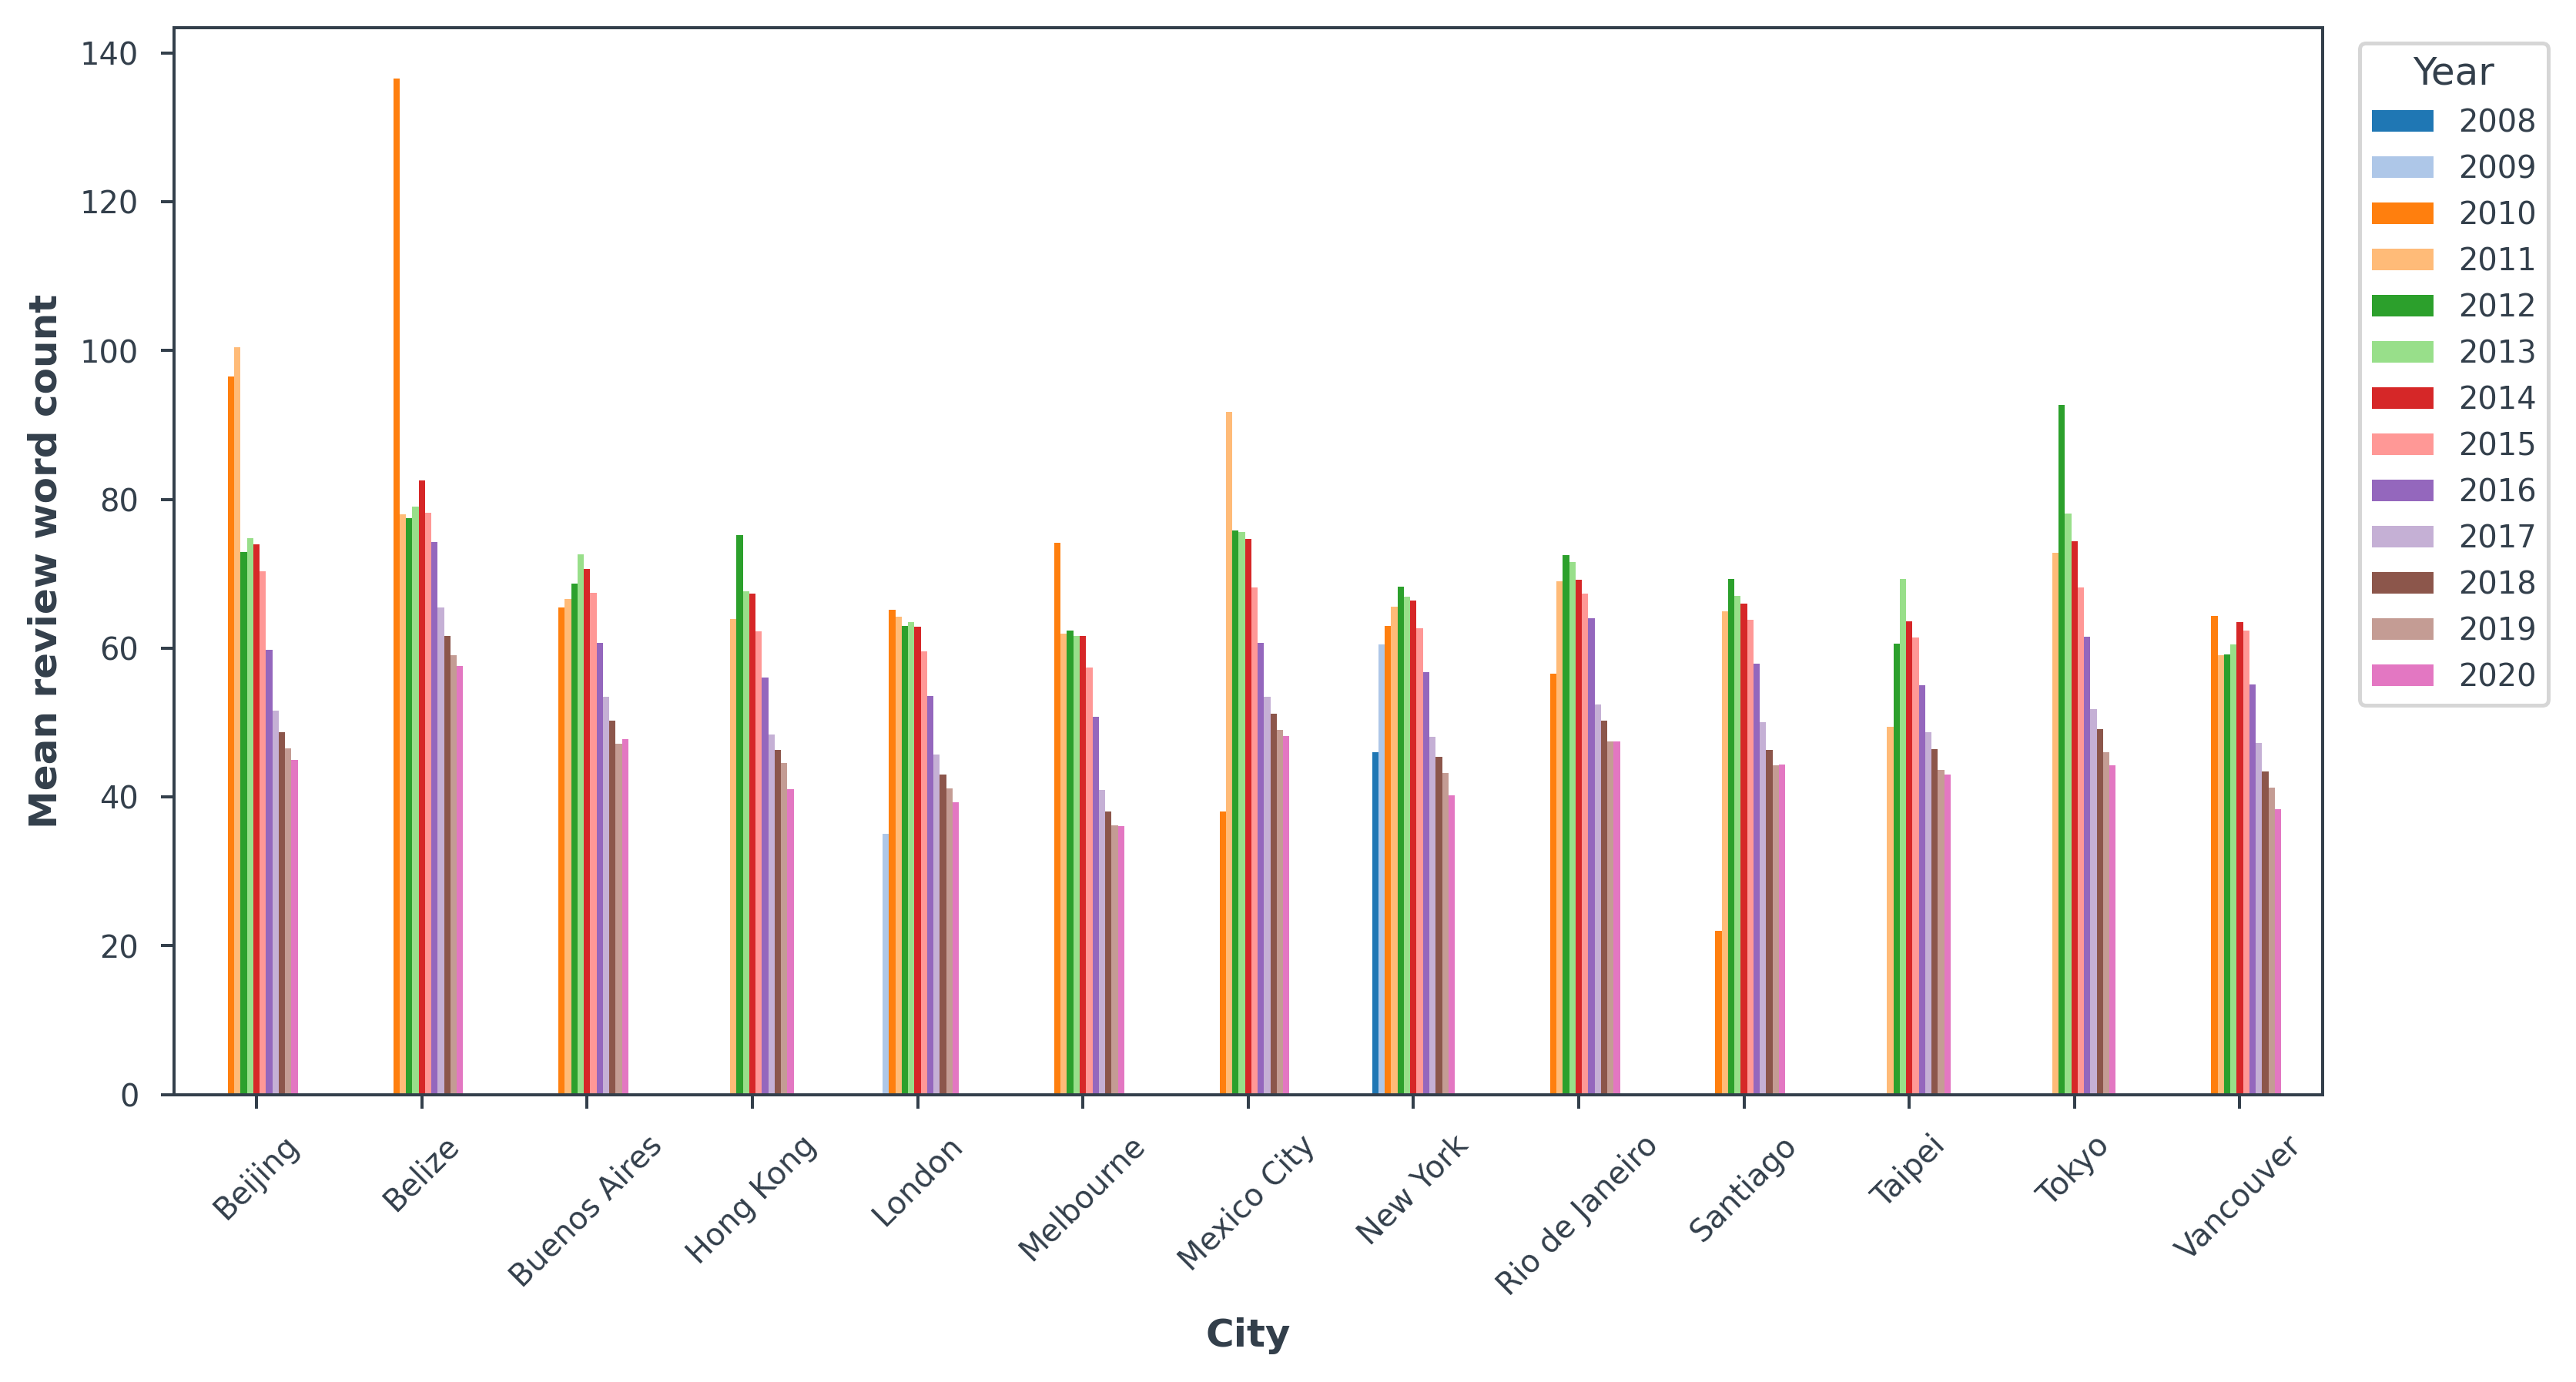

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'year'])['review_word_count'].mean().reset_index().pivot('city', 'year', 'review_word_count').plot(kind='bar', ax=ax, color=color)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Year')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

### Review preprocessing by sentences

#### Plot most frequent words before preprocessing

In [14]:
def freq_words(reviews):
    all_words = [word for sentences in reviews for sentence in sentences for word in simple_preprocess(str(sentence), deacc=True)]
    freq_dist = FreqDist(all_words)
    return freq_dist

In [15]:
%%time
words_freq = freq_words(data.comments_to_sentences.tolist())

CPU times: user 7min 44s, sys: 21.7 s, total: 8min 5s
Wall time: 8min 5s


In [16]:
def plot_freq_words(fdist, terms=20):
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns='count', n=terms) 
    
    plt.figure(figsize=(20,7))
    ax = sns.barplot(data=d, x='word', y='count')
    ax.set_ylabel('Count')
    ax.set_xlabel('Word')
    plt.title('Most frequent words before preprocessing')
    
    plt.show();

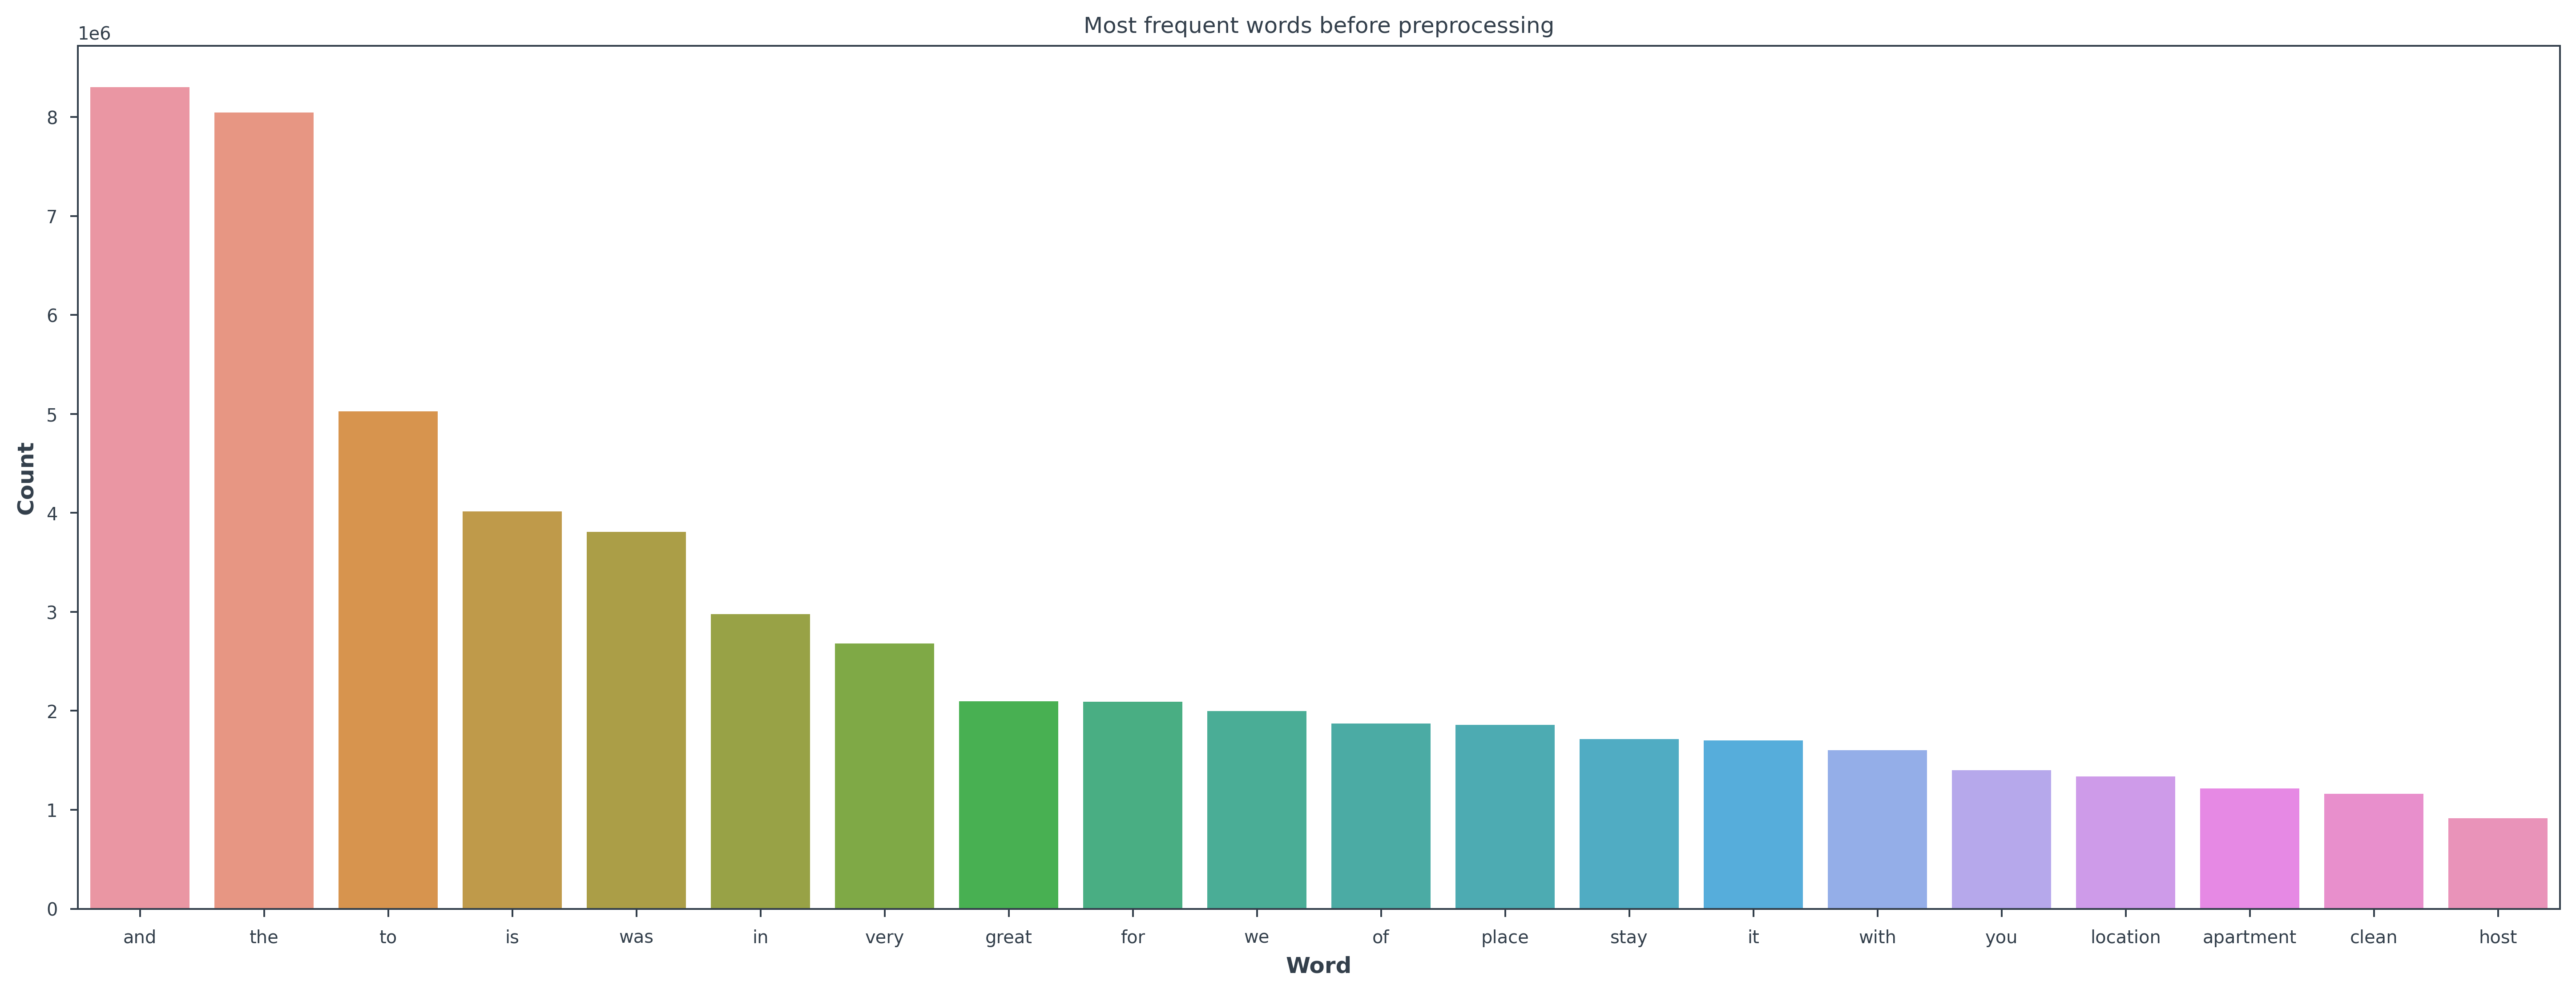

In [17]:
plot_freq_words(words_freq, 20)

#### Tokenize, lowercase and remove punctuation

In [18]:
def sentence_to_words(review):
    return [simple_preprocess(str(sentence), deacc=True) for sentence in review]

In [19]:
%%time
data['tokens'] = data.comments_to_sentences.apply(lambda reviews: sentence_to_words(reviews))

CPU times: user 6min 35s, sys: 8.25 s, total: 6min 43s
Wall time: 6min 43s


In [20]:
data.comments_to_sentences.tolist()[:1]

[['My girlfriend and I had not known Alina before we took the leap of faith to rent her flat.',
  'Alina just could not be nicer.',
  'Her flat is comfortable homey very sunny and quiet at night.',
  'Her diverse neighborhood rocks.',
  'it is full of excellent eateries of varying ethnicities good supermarkets etc.',
  'etc.',
  'Her place is about a minute walk to the Finsbury Park tube stop and there are also several buses that ply Stroud Green Road.',
  'The Piccadilly and Victoria tube lines that serve Finsbury Park are very dependable and come frequently.',
  'My only caveat is if you are unwilling to take to minute commutes to downtown London attractions and money is no object you will prefer to stay downtown.',
  'But for anyone else you will love your experience of living in a real untouristy neighborhood and dealing with a generous warm-hearted woman I am happy to call a new friend']]

In [21]:
data.tokens.tolist()[:1]

[[['my',
   'girlfriend',
   'and',
   'had',
   'not',
   'known',
   'alina',
   'before',
   'we',
   'took',
   'the',
   'leap',
   'of',
   'faith',
   'to',
   'rent',
   'her',
   'flat'],
  ['alina', 'just', 'could', 'not', 'be', 'nicer'],
  ['her',
   'flat',
   'is',
   'comfortable',
   'homey',
   'very',
   'sunny',
   'and',
   'quiet',
   'at',
   'night'],
  ['her', 'diverse', 'neighborhood', 'rocks'],
  ['it',
   'is',
   'full',
   'of',
   'excellent',
   'eateries',
   'of',
   'varying',
   'ethnicities',
   'good',
   'supermarkets',
   'etc'],
  ['etc'],
  ['her',
   'place',
   'is',
   'about',
   'minute',
   'walk',
   'to',
   'the',
   'finsbury',
   'park',
   'tube',
   'stop',
   'and',
   'there',
   'are',
   'also',
   'several',
   'buses',
   'that',
   'ply',
   'stroud',
   'green',
   'road'],
  ['the',
   'piccadilly',
   'and',
   'victoria',
   'tube',
   'lines',
   'that',
   'serve',
   'finsbury',
   'park',
   'are',
   'very',
   'depen

#### Lemmatize, remove stop words and tokens shorter than 2 character

In [22]:
def lemmatization(nlp, sentences, allow_postages=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sentence in sentences:
        sentence = nlp(' '.join(sentence)) 
        texts_out.append([token.lemma_ for token in sentence if token.pos_ in allow_postages 
                          and token.lemma_ not in stop_words and len(token.lemma_) > 2])
    return texts_out

In [23]:
%%time
nlp = spacy.load('en', disable=['parser', 'ner'])

data['data_lemmatized'] = data.tokens.apply(lambda sentences: lemmatization(nlp, sentences))

CPU times: user 11h 2min 40s, sys: 1min 27s, total: 11h 4min 7s
Wall time: 11h 4min 6s


In [24]:
data.data_lemmatized.tolist()[:1]

[[['girlfriend', 'leap', 'faith'],
  [],
  ['homey', 'night'],
  ['neighborhood', 'rock'],
  ['eatery', 'ethnicity', 'supermarket'],
  [],
  ['place',
   'minute',
   'walk',
   'finsbury',
   'park',
   'tube',
   'stop',
   'bus',
   'road'],
  ['tube', 'line', 'finsbury', 'park'],
  ['caveat', 'commute', 'attraction', 'money', 'object', 'downtown'],
  ['experience', 'living', 'neighborhood', 'woman', 'friend']]]

In [25]:
data.head()

id        date                                           comments  \
0  13913  2010-08-18  My girlfriend and I hadn't known Alina before ...   
1  13913  2011-07-11  Alina was a really good host. The flat is clea...   
2  13913  2011-09-13  Alina is an amazing host. She made me feel rig...   
3  13913  2011-10-03  Alina's place is so nice, the room is big and ...   
4  13913  2011-10-09  Nice location in Islington area, good for shor...   

   host_id neighbourhood_cleansed    city  latitude  longitude  \
0    54730              Islington  London  51.56802   -0.11121   
1    54730              Islington  London  51.56802   -0.11121   
2    54730              Islington  London  51.56802   -0.11121   
3    54730              Islington  London  51.56802   -0.11121   
4    54730              Islington  London  51.56802   -0.11121   

   number_of_reviews first_review  ...  year  sentiment_from_rating  \
0                 21   2010-08-18  ...  2010                    pos   
1                 21   2010-08-18  ...  2011                    pos   
2                 21   2010-08-18  ...  2011                    pos   
3                 21   2010-08-18  ...  2011                    pos   
4                 21   2010-08-18  ...  2011                    pos   

  sentiment_reviews sentiment_reviews_textblob  \
0                 1                          1   
1                 1                          1   
2                 1                          1   
3                 1                          1   
4                 1                          1   

                               comments_to_sentences  \
0  [My girlfriend and I had not known Alina befor...   
1  [Alina was a really good host., The flat is cl...   
2  [Alina is an amazing host., She made me feel r...   
3  [Alina s place is so nice the room is big and ...   
4  [Nice location in Islington area good for shor...   

              sentiment_sentences     type review_word_bined  \
0  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1]  Western              Long   
1                       [0, 0, 0]  Western            Medium   
2           [1, 0, 1, 1, 0, 0, 1]  Western              Long   
3                    [1, 1, 0, 1]  Western              Long   
4                          [1, 1]  Western             Short   

                                              tokens  \
0  [[my, girlfriend, and, had, not, known, alina,...   
1  [[alina, was, really, good, host], [the, flat,...   
2  [[alina, is, an, amazing, host], [she, made, m...   
3  [[alina, place, is, so, nice, the, room, is, b...   
4  [[nice, location, in, islington, area, good, f...   

                                     data_lemmatized  
0  [[girlfriend, leap, faith], [], [homey, night]...  
1                      [[host], [park, station], []]  
2  [[host], [home], [friend, stranger], [espresso...  
3  [[room, bed], [host, instance, towel, bed, hom...  
4         [[location, area, business, trip], [host]]  

[5 rows x 29 columns]

#### Plot most frequent words after preprocessing

In [26]:
words_freq = freq_words(data.data_lemmatized.tolist())

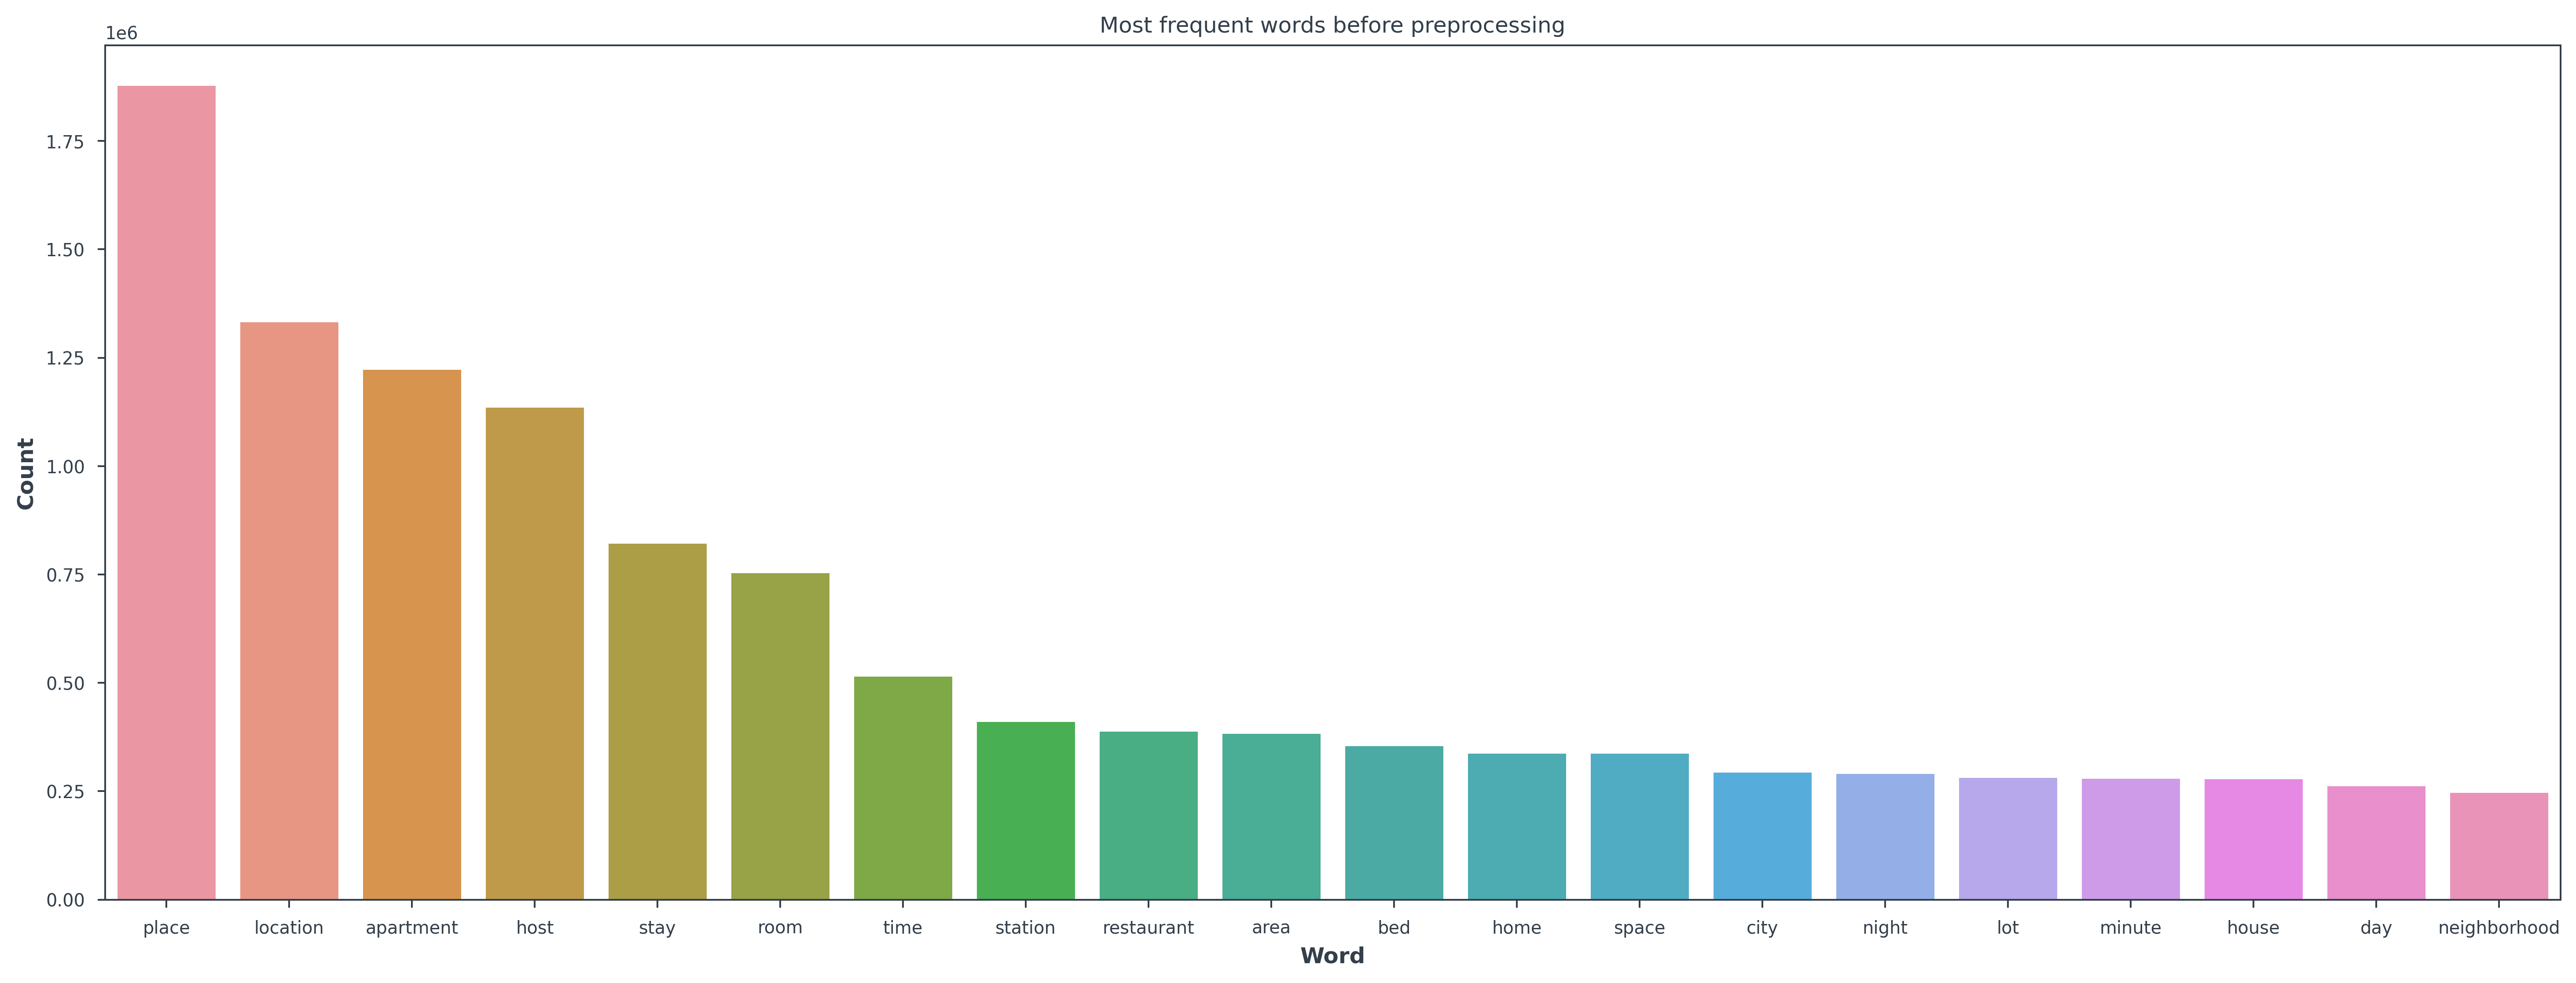

In [27]:
plot_freq_words(words_freq, 20)

#### Plot wordcloud of most frequent words

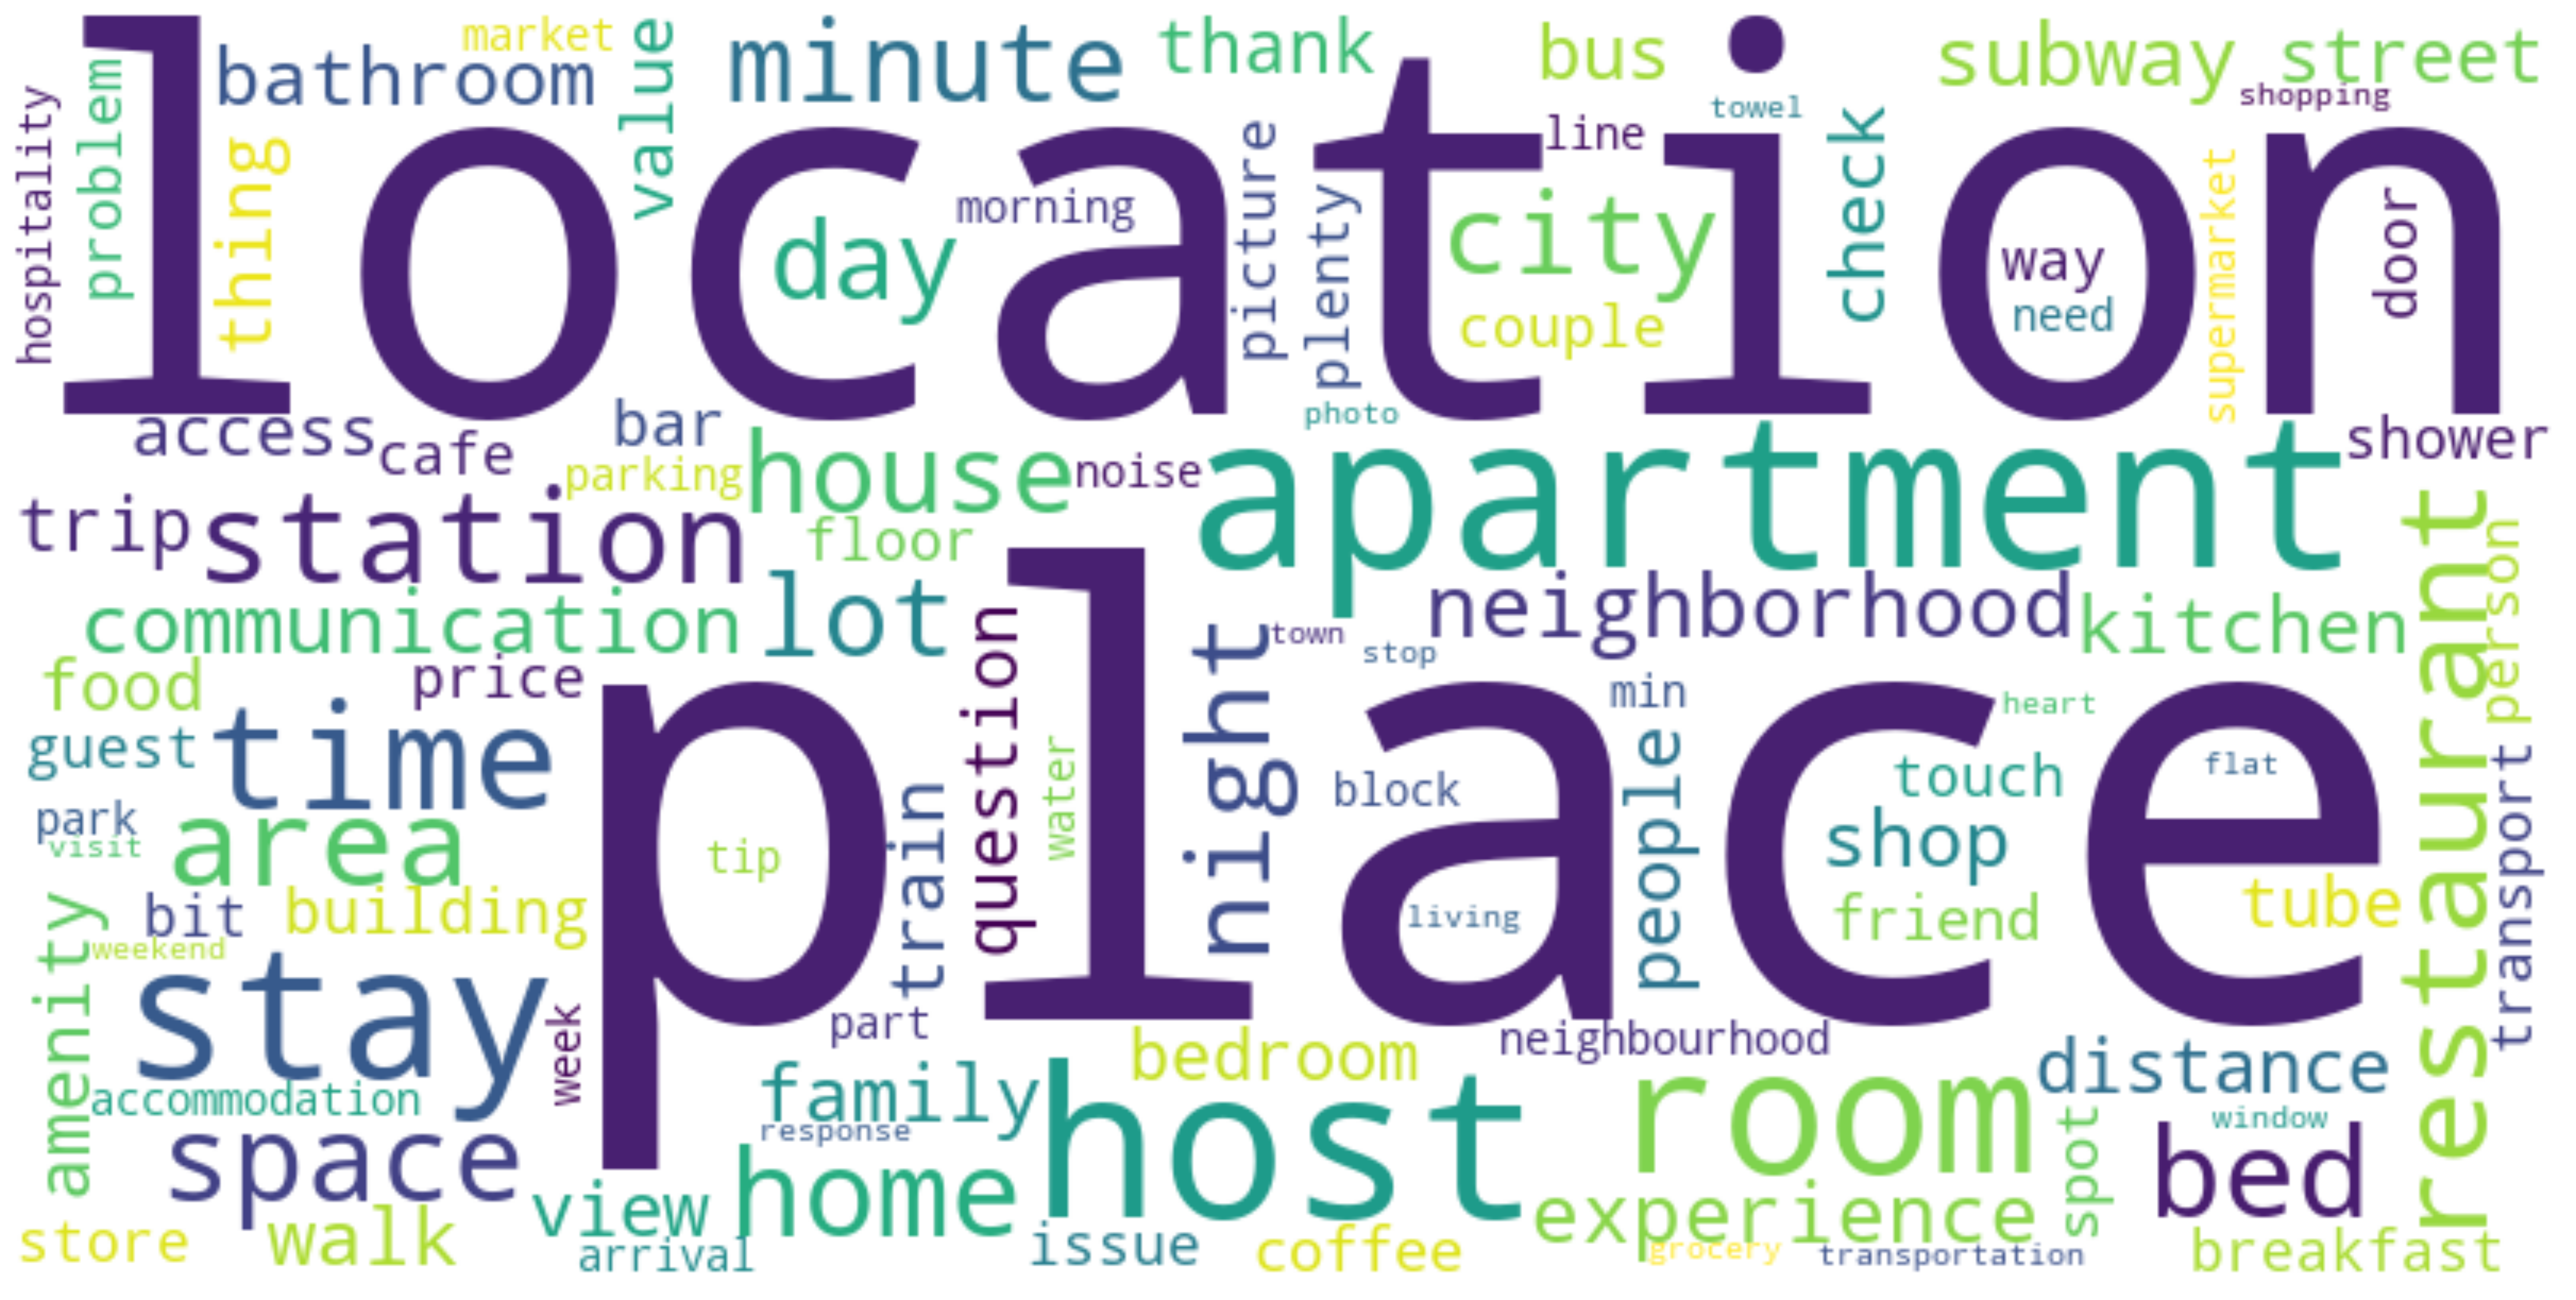

In [28]:
from wordcloud import WordCloud, ImageColorGenerator
    
wordcloud = WordCloud(background_color='white', width=800, height=400,
                      max_words=100,
                      random_state=42).generate_from_frequencies(words_freq)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.tight_layout(pad=0)
plt.show();

#### Remove less frequent words

In [29]:
less_frequent_words = set([word for word, v in words_freq.items() if v < 2])
def remove_less_freq_words(text):
    return [word for sentence in text for word in sentence.split() if word not in less_frequent_words]

In [30]:
data['data_lemmatized_freq'] = data.data_lemmatized.apply(lambda review: [remove_less_freq_words(sentence) 
                                                                                     for sentence in review])

In [31]:
data.to_pickle('data_preprocessed.pkl')

In [1]:
data

NameError: name 'data' is not defined